In [98]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf

import math

In [100]:
file_path = Path(r"C:/Users/AYOOLA5\Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_ratings.csv")
IMbd_ratings_df = pd.read_csv(file_path)
IMbd_ratings_df.head() 

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [101]:
file_path = Path(r"C:/Users/AYOOLA5\Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_movies1.csv")
movies_df = pd.read_csv(file_path)
movies_df.head() 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0
2,tt0001892,Drama,53,"Germany, Denmark",NaN,5.8,188,NaN,5.0,2.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0


In [102]:
#Selecting relevant data from IMDb_ratings
clean_ratings_df = IMbd_ratings_df[["imdb_title_id",
                             "weighted_average_vote",
                             "total_votes",
                             "allgenders_0age_votes",
                             "allgenders_18age_votes",
                             "allgenders_30age_votes",
                             "allgenders_45age_votes",
                             "males_allages_votes",
                             "females_allages_votes"]]
clean_ratings_df.head()

,imdb_title_id,weighted_average_vote,total_votes,allgenders_0age_votes,allgenders_18age_votes,allgenders_30age_votes,allgenders_45age_votes,males_allages_votes,females_allages_votes
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [103]:
#renaming headers in ratings data to avoid confusion
new_names = {"allgenders_0age_votes":"tot_voters_below_18",
            "allgenders_18age_votes":"tot_voters_below_30",
            "allgenders_30age_votes":"tot_voters_below_45",
            "allgenders_45age_votes" : "tot_voters_above_45",
            "males_allages_votes":"tot_male_voters",
             "females_allages_votes": "tot_female_voters"}
ratings_df = clean_ratings_df.rename(columns=new_names)
ratings_df.head(5)

,imdb_title_id,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [104]:
imdb_data_df = pd.merge(movies_df,ratings_df, on="imdb_title_id", how="outer")
imdb_data_df.head()

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,Drama,53,"Germany, Denmark",NaN,5.8,188,NaN,5.0,2.0,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [105]:
#total null values in each column
imdb_data_df.isnull().sum()

imdb_title_id                0
genre                        0
duration                     0
country                     64
language                   833
avg_vote                     0
votes                        0
budget                   62145
reviews_from_users        7597
reviews_from_critics     11797
weighted_average_vote        0
total_votes                  0
tot_voters_below_18      52496
tot_voters_below_30        706
tot_voters_below_45         10
tot_voters_above_45         80
tot_male_voters              1
tot_female_voters           81
dtype: int64

In [106]:
#Combining under 18 and under 30 columns to reduce null values in tot_voters_below_18 column
below_18 = imdb_data_df["tot_voters_below_18"]
below_30 = imdb_data_df["tot_voters_below_30"]

combined = []

#Initiating for loop to add values in below 18 and below 30 columns 
#Appending it to combined list to replace both columns by combined

for i in range(len(imdb_data_df)):
    if math.isnan(below_18[i]) is True & math.isnan(below_30[i]) is True:
        combined.append(below_18[i] + below_30[i])
        

    elif math.isnan(below_18[i]) is True and math.isnan(below_30[i]) is False:
        combined.append(below_30[i])
            
    elif math.isnan(below_18[i]) == False and math.isnan(below_30[i]) == True:
        combined.append(below_18[i])
            
    else:
        combined.append(0)

In [107]:
# Dropping under 18 columns
imdb_data_df = imdb_data_df.drop("tot_voters_below_18", axis = 1)

# Repacing under 18 and under 30 columns by under 30(combined)
imdb_data_df["tot_voters_below_18"] = combined

In [108]:
#dropping empty values
imdb_data_df = imdb_data_df.dropna(subset =["language"])
imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [109]:
imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [110]:
Clean_imdb_data_df = imdb_data_df.drop(["imdb_title_id"],1)
Clean_imdb_data_df

,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [111]:
#Clean_imdb_data_df = Clean_imdb_data_df["genre"].str.split(',',expand=True)
#Clean_imdb_data_df

#Clean_imdb_data_df.assign(genre1  = Clean_imdb_data_df.genre.str.split("|", expand = True).iloc[:,:1],
                          #genre2 = Clean_imdb_data_df.genre.str.split("|", expand = True).iloc[:,1:2])




In [112]:
Clean_imdb_data_df = imdb_data_df.drop_duplicates()
Clean_imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [113]:
Clean_imdb_data_df.dtypes


imdb_title_id             object
genre                     object
duration                   int64
country                   object
language                  object
avg_vote                 float64
votes                      int64
budget                    object
reviews_from_users       float64
reviews_from_critics     float64
weighted_average_vote    float64
total_votes                int64
tot_voters_below_30      float64
tot_voters_below_45      float64
tot_voters_above_45      float64
tot_male_voters          float64
tot_female_voters        float64
tot_voters_below_18      float64
dtype: object

In [114]:
print(f"Duplicates entries: {Clean_imdb_data_df.duplicated().sum()}")

Duplicates entries: 0


In [115]:
Clean_imdb_data_df1 = imdb_data_df.drop(["imdb_title_id","budget"],1)
Clean_imdb_data_df1

,genre,duration,country,language,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Comedy,95,"France, Belgium",French,5.3,398,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,Drama,130,India,Malayalam,7.9,265,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [116]:
Clean_imdb_data_df1 = Clean_imdb_data_df1.dropna()
Clean_imdb_data_df1 

,genre,duration,country,language,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85842,"Animation, Adventure, Crime",58,Japan,Japanese,6.9,103,1.0,1.0,6.9,103,22.0,30.0,8.0,64.0,3.0,22.0
85843,"Action, Thriller",145,India,Tamil,8.5,8400,188.0,8.0,8.5,8400,2297.0,1469.0,84.0,4577.0,121.0,0.0
85846,War,92,UK,"English, Polish, Russian, German",5.0,764,29.0,6.0,5.0,764,37.0,135.0,151.0,310.0,36.0,0.0
85849,"Comedy, Drama",122,India,Malayalam,6.8,491,9.0,1.0,6.8,491,134.0,117.0,7.0,289.0,8.0,134.0


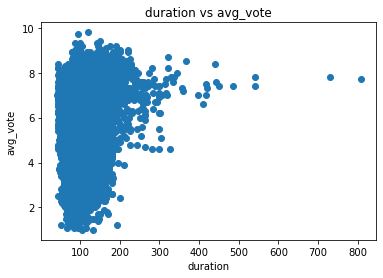

In [117]:
import matplotlib.pyplot as plt
duration = Clean_imdb_data_df1 ['duration'].tolist()
avg_vote = Clean_imdb_data_df1 ['avg_vote'].tolist()
plt.scatter(duration,avg_vote)
plt.title('duration vs avg_vote')
plt.xlabel('duration')
plt.ylabel('avg_vote')
plt.show()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


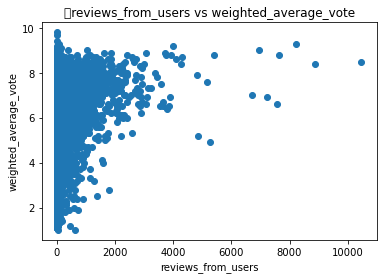

In [118]:
import matplotlib.pyplot as plt
reviews_from_users = Clean_imdb_data_df1 ['reviews_from_users'].tolist()
weighted_average_vote = Clean_imdb_data_df1 ['weighted_average_vote'].tolist()
plt.scatter(reviews_from_users,weighted_average_vote)
plt.title('	reviews_from_users vs weighted_average_vote')
plt.xlabel('reviews_from_users')
plt.ylabel('weighted_average_vote')
plt.show()

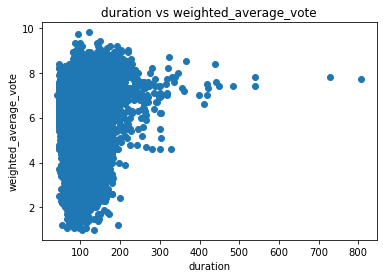

In [119]:
import matplotlib.pyplot as plt
duration = Clean_imdb_data_df1 ['duration'].tolist()
weighted_average_vote = Clean_imdb_data_df1 ['weighted_average_vote'].tolist()
plt.scatter(duration,weighted_average_vote)
plt.title('duration vs weighted_average_vote')
plt.xlabel('duration')
plt.ylabel('weighted_average_vote')
plt.show()

In [120]:
# Determine the number of unique values in each column.
ratings_cat = Clean_imdb_data_df1.dtypes[Clean_imdb_data_df1.dtypes == "object"].index.tolist()
ratings_cat 

['genre', 'country', 'language']

In [121]:
Clean_imdb_data_df1[ratings_cat ].nunique()

genre       1192
country     4424
language    3978
dtype: int64

In [122]:
genre = Clean_imdb_data_df1.genre.value_counts()
genre 

Drama                           9310
Comedy                          4684
Comedy, Drama                   3091
Drama, Romance                  2729
Horror                          2054
                                ... 
Mystery, Romance, Western          1
Sci-Fi, Drama, Mystery             1
Comedy, Western, Musical           1
Thriller, Action, Adventure        1
Animation, Adventure, Horror       1
Name: genre, Length: 1192, dtype: int64

<AxesSubplot:ylabel='Density'>

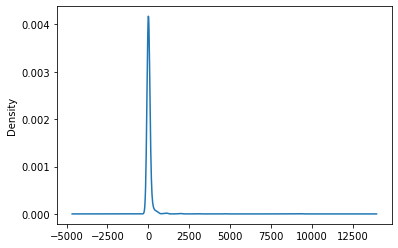

In [123]:
# Visualize the value counts of genre
genre.plot.density()

In [124]:
# Determine which values to replace if counts are less than ...?
replace_genre = list(genre [genre < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df1.genre = Clean_imdb_data_df1.genre.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df1.genre.value_counts()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other                        31559
Drama                         9310
Comedy                        4684
Comedy, Drama                 3091
Drama, Romance                2729
Horror                        2054
Comedy, Drama, Romance        1954
Comedy, Romance               1858
Action, Crime, Drama          1160
Horror, Thriller              1130
Drama, Thriller               1120
Crime, Drama                  1106
Thriller                       975
Crime, Drama, Thriller         911
Action, Drama                  688
Crime, Drama, Mystery          607
Drama, War                     589
Action, Adventure, Drama       550
Action                         544
Action, Adventure, Comedy      544
Horror, Mystery, Thriller      538
Comedy, Horror                 527
Western                        524
Name: genre, dtype: int64

In [125]:
# Look at duration value counts for binning
duration= Clean_imdb_data_df1.duration.value_counts()
duration

90     3946
95     2535
100    2411
92     2010
93     1978
       ... 
229       1
228       1
290       1
225       1
319       1
Name: duration, Length: 252, dtype: int64

<AxesSubplot:ylabel='Density'>

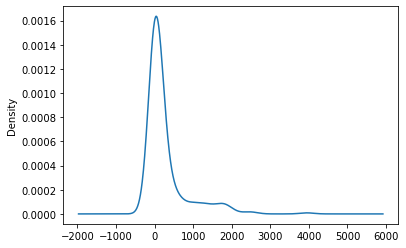

In [126]:
# Visualize the value counts of duration
duration.plot.density()

In [127]:
# Determine which values to replace if counts are less than ...?
replace_duration = list(duration [duration < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df1.duration = Clean_imdb_data_df1.duration.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.duration.value_counts()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


90     5107
95     3166
100    3076
93     2398
92     2390
       ... 
421       1
357       1
293       1
229       1
319       1
Name: duration, Length: 264, dtype: int64

In [128]:
country = Clean_imdb_data_df1.country.value_counts()
country

USA                                 25921
India                                3769
UK                                   3652
Japan                                2589
France                               2482
                                    ...  
Netherlands, Belgium, UK, France        1
West Germany, France, Yugoslavia        1
Argentina, Spain, France, Mexico        1
Israel, USA, France                     1
UK, Romania, Canada                     1
Name: country, Length: 4424, dtype: int64

<AxesSubplot:ylabel='Density'>

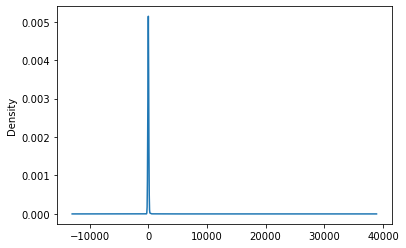

In [129]:
# Visualize the value counts of duration
country.plot.density()

In [130]:
# Determine which values to replace if counts are less than ...?
replace_country = list(country [country < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df1.country = Clean_imdb_data_df1.country.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df1.country.value_counts()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


USA                                 25921
India                                3769
UK                                   3652
Japan                                2589
France                               2482
                                    ...  
Netherlands, Belgium, UK, France        1
West Germany, France, Yugoslavia        1
Argentina, Spain, France, Mexico        1
Israel, USA, France                     1
UK, Romania, Canada                     1
Name: country, Length: 4424, dtype: int64

In [131]:
import gc
gc.collect()

8781

In [132]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Clean_imdb_data_df1[ratings_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(ratings_cat)
encode_df.head()

,genre_Action,"genre_Action, Adventure, Comedy","genre_Action, Adventure, Drama","genre_Action, Crime, Drama","genre_Action, Drama",genre_Comedy,"genre_Comedy, Drama","genre_Comedy, Drama, Romance","genre_Comedy, Horror","genre_Comedy, Romance",...,"language_Yoruba, English","language_Yoruba, English, Ibo, Hausa","language_Yoruba, Portuguese",language_Zulu,"language_Zulu, Afrikaans, Xhosa, English","language_Zulu, English","language_Zulu, English, Afrikaans","language_Zulu, English, Hindi","language_Zulu, Southern Sotho, Afrikaans, English","language_Zulu, Xhosa, Afrikaans, English"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Merge one-hot encoded features and drop the originals
Clean_imdb_data_df1 = Clean_imdb_data_df1.merge(encode_df,left_index=True, right_index=True)
Clean_imdb_data_df1 = Clean_imdb_data_df1.drop(ratings_cat,1)
Clean_imdb_data_df1.head()

MemoryError: Unable to allocate 3.51 GiB for an array with shape (55943, 8425) and data type float64

In [ ]:
Clean_imdb_data_df1

In [ ]:
import sklearn as skl

# Split our preprocessed data into our features and target arrays
y = Clean_imdb_data_df1["weighted_average_vote"]
X = Clean_imdb_data_df1.drop(["weighted_average_vote"],1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Create scaler instance
# X_scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
# Split our preprocessed data into our features and target arrays
y = Clean_imdb_data_df1["weighted_average_vote"]
X = Clean_imdb_data_df1.drop(["weighted_average_vote"],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train)

In [ ]:
# Create the SVM model
svm = SVC(kernel='linear')

In [ ]:
# Train the model
svm.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [ ]:
#  Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
new_fit_model = nn.fit(X_train_scaled, y_train, epochs=100, shuffle=True)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")